# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset 🔧🚜

Nos basamos en el dataset de Kaggle: [Machine Predictive Maintenance Classification](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification).

# 1) Cargamos los datos 📕

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("predictive_maintenance.csv", sep=",")

In [3]:
data.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure


# 2) Preparación de la data 👀

In [4]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,UDI,0,0.0,0,0.0000,10000,int64
1,Product ID,0,0.0,0,0.0000,10000,object
2,Type,0,0.0,0,0.0000,3,object
3,Air temperature [K],0,0.0,0,0.0000,93,float64
4,Process temperature [K],0,0.0,0,0.0000,82,float64
5,Rotational speed [rpm],0,0.0,0,0.0000,941,int64
6,Torque [Nm],0,0.0,0,0.0000,577,float64
7,Tool wear [min],0,0.0,120,0.0120,246,int64
8,Target,0,0.0,9661,0.9661,2,int64
9,Failure Type,0,0.0,0,0.0000,6,object


Eliminar las columnas `UDI` y `Product ID`.

In [5]:
data = data.drop(["UDI", "Product ID"], axis=1)

Este dataset tiene 2 columnas objetivo:
<br>`Target` : Falla o no falla -> Para hacer un modelo de clasificación binaria
<br>`Failure Type` : Tipo de falla -> Para hacer clustering **(nuestro caso)**

In [6]:
data = data.drop(["Target"], axis=1)

In [7]:
data.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure


# 3) AED & Storytelling 🧐

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

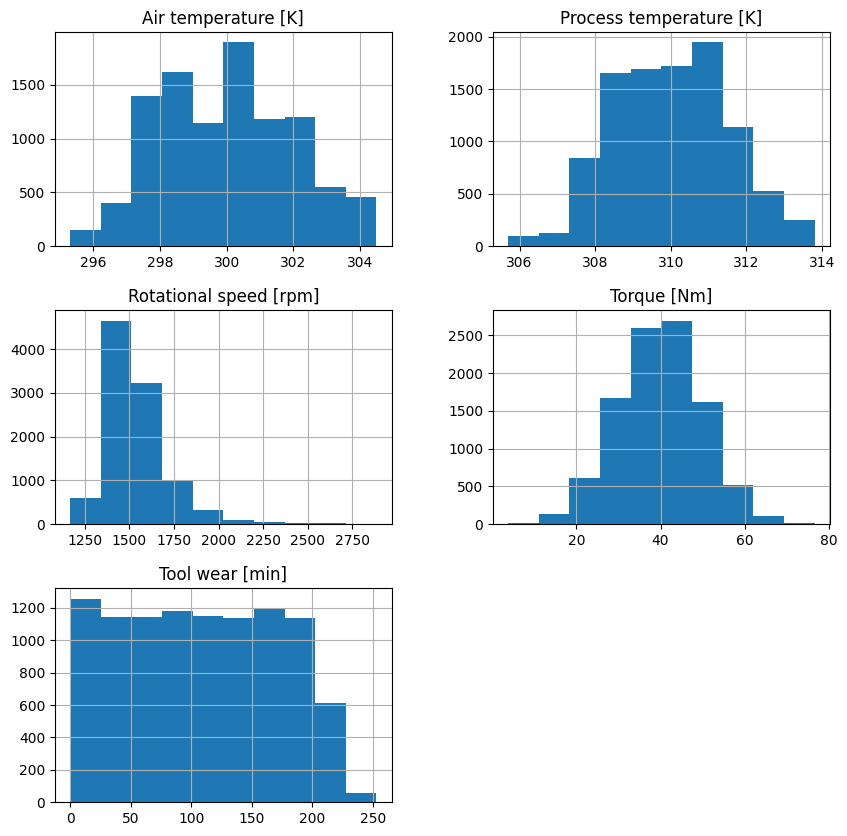

In [8]:
data.hist(figsize = (10,10))

In [9]:
len(data)

10000

In [10]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:00<00:00, 1165.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aplicar get dummies

In [11]:
filter_data = pd.get_dummies(data)

In [12]:
filter_data.head(3)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,298.1,308.6,1551,42.8,0,False,False,True,False,True,False,False,False,False
1,298.2,308.7,1408,46.3,3,False,True,False,False,True,False,False,False,False
2,298.1,308.5,1498,49.4,5,False,True,False,False,True,False,False,False,False


In [13]:
status(filter_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Air temperature [K],0,0.0,0,0.0000,93,float64
1,Process temperature [K],0,0.0,0,0.0000,82,float64
2,Rotational speed [rpm],0,0.0,0,0.0000,941,int64
3,Torque [Nm],0,0.0,0,0.0000,577,float64
4,Tool wear [min],0,0.0,120,0.0120,246,int64
5,Type_H,0,0.0,8997,0.8997,2,bool
6,Type_L,0,0.0,4000,0.4000,2,bool
7,Type_M,0,0.0,7003,0.7003,2,bool
8,Failure Type_Heat Dissipation Failure,0,0.0,9888,0.9888,2,bool
9,Failure Type_No Failure,0,0.0,348,0.0348,2,bool


# 4) Clustering con K-Means 🎯

## 4.1) Tenemos que normalizar los datos (z-score)

In [14]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-9.322321e-16,-1.693934e-15,-2.330580e-16,5.424994e-16,1.051603e-16,-4.263256e-17,4.760636e-17,-9.592327e-17,2.842171e-17,2.728484e-16,-6.856737e-17,2.415845e-17,-2.842171e-18,-2.753353e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-2.352278e+00,-2.901986e+00,-2.068196e+00,-3.630149e+00,-1.695984e+00,-3.338886e-01,-1.224745e+00,-6.541861e-01,-1.064277e-01,-5.266463e+00,-8.866408e-02,-9.793424e-02,-4.246464e-02,-6.723349e-02
25%,-8.523974e-01,-8.125581e-01,-6.458012e-01,-6.808401e-01,-8.633176e-01,-3.338886e-01,-1.224745e+00,-6.541861e-01,-1.064277e-01,1.898808e-01,-8.866408e-02,-9.793424e-02,-4.246464e-02,-6.723349e-02
50%,4.753123e-02,6.365340e-02,-1.995597e-01,1.134481e-02,7.698234e-04,-3.338886e-01,8.164966e-01,-6.541861e-01,-1.064277e-01,1.898808e-01,-8.866408e-02,-9.793424e-02,-4.246464e-02,-6.723349e-02
75%,7.474757e-01,7.376623e-01,4.084443e-01,6.834663e-01,8.491466e-01,-3.338886e-01,8.164966e-01,1.528617e+00,-1.064277e-01,1.898808e-01,-8.866408e-02,-9.793424e-02,-4.246464e-02,-6.723349e-02
max,2.247357e+00,2.557486e+00,7.514840e+00,3.672902e+00,2.278819e+00,2.995011e+00,8.164966e-01,1.528617e+00,9.396048e+00,1.898808e-01,1.127853e+01,1.021093e+01,2.354900e+01,1.487354e+01


## 4.2) Creación del modelo

In [15]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [16]:
pred_cl = cl_model.predict(x_data_norm)

# Número de cluster: 
pred_cl

array([1, 2, 2, ..., 1, 1, 1])

## 4.3) Pequeño paréntesis... ¿Cantidad de clusters?

In [17]:
cl_model

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [18]:
from copy import deepcopy

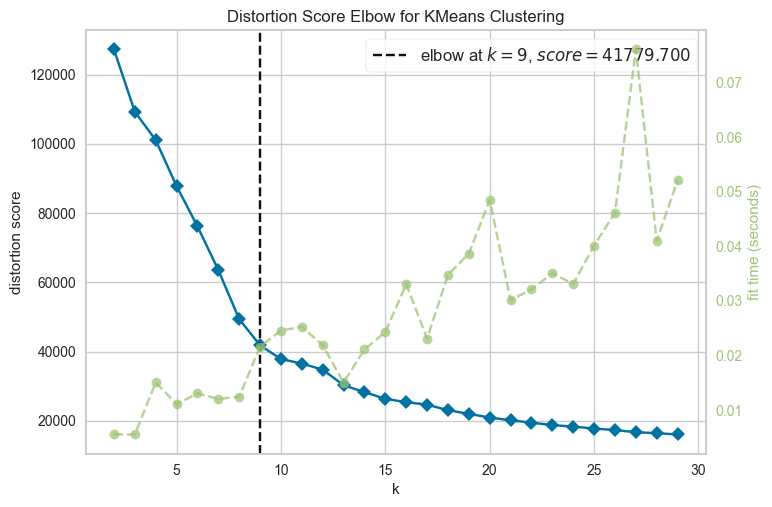

,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,29
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [19]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

Copy-paste de la [doc](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html): _distortion, which computes the sum of squared distances from each point to its assigned center._

## 4.4) Analizando el modelo final: Gráfico de coordenadas

Hacemos copia de los datos y le agregamos el cluster:

In [20]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [21]:
x_data_cl.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure,cluster
0,298.1,308.6,1551,42.8,0,False,False,True,False,True,False,False,False,False,1
1,298.2,308.7,1408,46.3,3,False,True,False,False,True,False,False,False,False,2
2,298.1,308.5,1498,49.4,5,False,True,False,False,True,False,False,False,False,2
3,298.2,308.6,1433,39.5,7,False,True,False,False,True,False,False,False,False,2
4,298.2,308.7,1408,40.0,9,False,True,False,False,True,False,False,False,False,2


In [22]:
from funpymodeling.model_validation import coord_plot

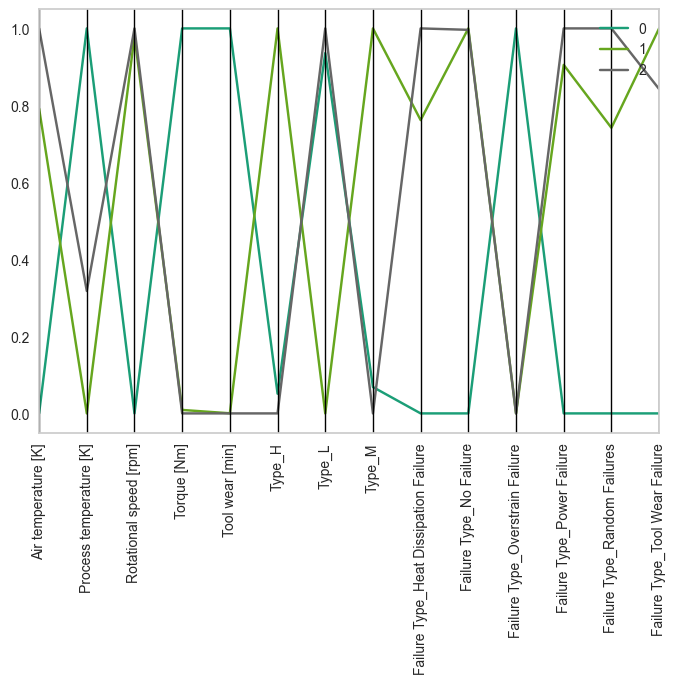

In [23]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [24]:
d_orig

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure,cluster
0,299.867949,310.051282,1354.243590,56.878205,208.217949,0.012821,0.935897,0.051282,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0
1,299.987259,309.994393,1538.002753,39.946083,107.180976,0.250814,0.000000,0.749186,0.009512,0.974969,0.0,0.009011,0.001502,0.005006,1
2,300.018643,310.012485,1541.725831,39.792138,107.150498,0.000000,1.000000,0.000000,0.012485,0.971318,0.0,0.009954,0.002025,0.004218,2


In [25]:
d_transf

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure,cluster
0,0.000000,1.000000,0.000000,1.00000,1.000000,0.051116,0.935897,0.06845,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0
1,0.791735,0.000000,0.980142,0.00901,0.000302,1.000000,0.000000,1.00000,0.761851,1.000000,0.0,0.90525,0.741802,1.000000,1
2,1.000000,0.318027,1.000000,0.00000,0.000000,0.000000,1.000000,0.00000,1.000000,0.996255,0.0,1.00000,1.000000,0.842543,2


## Bonus: Scatter 3D!

In [26]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Type,0,0.0,0,0.000,3,object
1,Air temperature [K],0,0.0,0,0.000,93,float64
2,Process temperature [K],0,0.0,0,0.000,82,float64
3,Rotational speed [rpm],0,0.0,0,0.000,941,int64
4,Torque [Nm],0,0.0,0,0.000,577,float64
5,Tool wear [min],0,0.0,120,0.012,246,int64
6,Failure Type,0,0.0,0,0.000,6,object


In [27]:
# Tomamos muestra para que no nos explote el gráfico ;)
d2=data.sample(n=300)

In [28]:
#!pip3 install plotly

In [29]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='Type', y='Air temperature [K]', z='Torque [Nm]', color='Failure Type')
fig.show()

In [63]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl2=data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl2[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [64]:
x_data_cl2.cluster = x_data_cl2.cluster.astype(str) 
x_data_cl2.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,cluster
0,M,298.1,308.6,1551,42.8,0,No Failure,1
1,L,298.2,308.7,1408,46.3,3,No Failure,2
2,L,298.1,308.5,1498,49.4,5,No Failure,2
3,L,298.2,308.6,1433,39.5,7,No Failure,2
4,L,298.2,308.7,1408,40.0,9,No Failure,2


In [65]:
# Tomamos muestra para que no nos explote el gráfico ;)
d3=x_data_cl2.sample(n=600)

In [66]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(x_data_cl2, x='Failure Type', y='Air temperature [K]', z='Torque [Nm]', color='cluster')
fig.show()

**Nota** 
<br>Si no aparece el gráfico -> Instalar en la consola la extension:

`jupyter labextension install jupyterlab-plotly`

Luego reiniciar jupyer lab.

---

## Resumen!

- Modelo de clustering k-means (k=3)
- Gráfico del codo (elbow)
- Creamos datos para el visualizador
- Exploramos el modelo con `coord_plot` de `funpymodeling` <3



# 5) Clustering con HDBSCAN 🤖

## 5.1) Creación del modelo

Doc oficial: https://hdbscan.readthedocs.io/en/latest/

`!pip install hdbscan`

Ojo: En sklearn esta dbscan (sin la H). Es casi igual pero con más hiperparámetros.
<br>En HDBSCAN encuentra internamente prueba distintos valores (usen este).

La librería hdbscan actualmente presenta muchos conflictos con su versionado y distintas versiones con Python.

Así que también existe esta alternativa: [fast hdbscan](https://github.com/TutteInstitute/fast_hdbscan/)

`!pip install fast_hdbscan`

In [31]:
!pip install hdbscan

   ---------------------------------------- 0.0/730.9 kB ? eta -:--:--
   --------------------------------------- 730.9/730.9 kB 14.6 MB/s eta 0:00:00


In [32]:
import hdbscan

In [33]:
# Si utilizan la otra alternativa
# import fast_hdbscan

Generamos el modelo y fiteamos:
<br>**Condición todas las variables numéricas y sin nulos.**

In [34]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(filter_data)

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



,min_cluster_size,5
,min_samples,None
,cluster_selection_epsilon,0.0
,max_cluster_size,0
,metric,'euclidean'
,alpha,1.0
,p,None
,algorithm,'best'
,leaf_size,40
,memory,Memory(location=None)
,approx_min_span_tree,True


In [35]:
# Nro de cluster
model_hdb.labels_

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [36]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,5,9810,0.981,0.981
1,-1,116,0.0116,0.9926
2,0,20,0.002,0.9946
3,4,17,0.0017,0.9963
4,3,17,0.0017,0.998
5,2,8,0.0008,0.9988
6,1,7,0.0007,0.9995
7,6,5,0.0005,1.0


**8 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

## 5.2) Tuning/regularización de HDBSCAN para menos clusters

Muy útil cuando tenes muchos clusters

In [37]:
# Ese 4 significa que cada cluster va a tener como mínimo 4 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=4).fit(filter_data)

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [38]:
freq_tbl(model_hdb2.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,6,9815,0.9815,0.9815
1,-1,106,0.0106,0.9921
2,4,19,0.0019,0.994
3,3,17,0.0017,0.9957
4,0,14,0.0014,0.9971
5,1,13,0.0013,0.9984
6,2,10,0.001,0.9994
7,5,6,0.0006,1.0


**Notar el cluster de ruido. ¿qué cambió?**

## 5.3) Análisis del modelo cluster (profiling)

In [39]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [40]:
x_data_cl.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure,cluster
0,298.1,308.6,1551,42.8,0,False,False,True,False,True,False,False,False,False,6
1,298.2,308.7,1408,46.3,3,False,True,False,False,True,False,False,False,False,6
2,298.1,308.5,1498,49.4,5,False,True,False,False,True,False,False,False,False,6
3,298.2,308.6,1433,39.5,7,False,True,False,False,True,False,False,False,False,6
4,298.2,308.7,1408,40.0,9,False,True,False,False,True,False,False,False,False,6


Saquemos el cluster de ruido:

In [41]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

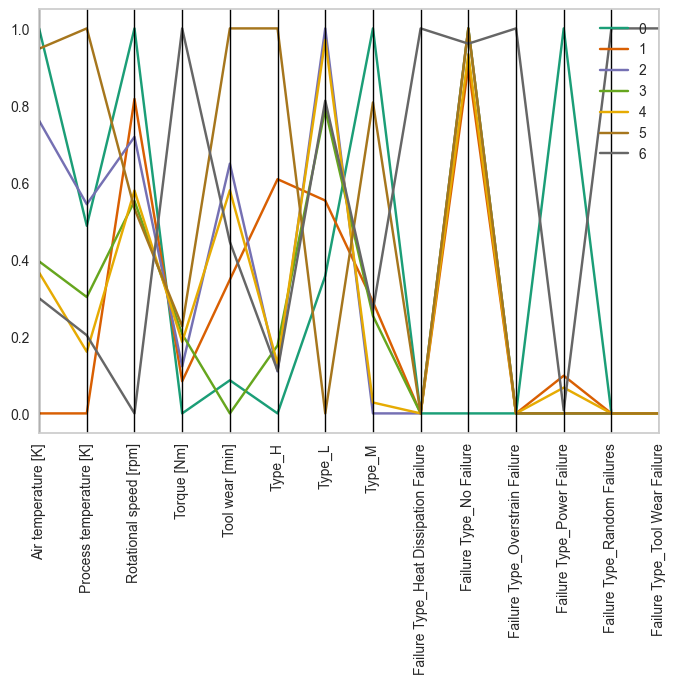

In [42]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [43]:
d_orig

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure,cluster
0,301.550000,310.685714,2673.142857,11.378571,53.071429,0.071429,0.357143,0.571429,0.000000,0.214286,0.000000,0.785714,0.000000,0.000000,0
1,299.338462,309.515385,2463.153846,13.800000,92.923077,0.230769,0.461538,0.307692,0.000000,0.923077,0.000000,0.076923,0.000000,0.000000,1
2,301.020000,310.820000,2350.200000,14.910000,138.900000,0.100000,0.700000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2
3,300.211765,310.241176,2159.058824,17.347059,39.941176,0.117647,0.588235,0.294118,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3
4,300.147368,309.900000,2190.473684,16.763158,128.368421,0.105263,0.684211,0.210526,0.000000,0.947368,0.000000,0.052632,0.000000,0.000000,4
5,301.433333,311.916667,2136.333333,17.933333,192.500000,0.333333,0.166667,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5
6,300.000224,310.002680,1526.753031,40.339063,107.912888,0.100458,0.599898,0.299643,0.011207,0.968823,0.007743,0.006215,0.001834,0.004177,6


In [44]:
d_transf

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure,cluster
0,1.000000,0.487377,1.000000,0.000000,0.086067,0.000000,0.357143,1.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0
1,0.000000,0.000000,0.816826,0.083611,0.347288,0.608392,0.552885,0.289941,0.0,0.902098,0.0,0.097902,0.0,0.0,1
2,0.760348,0.543300,0.718296,0.121940,0.648660,0.109091,1.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,2
3,0.394885,0.302252,0.551563,0.206091,0.000000,0.176471,0.790441,0.253394,0.0,1.000000,0.0,0.000000,0.0,0.0,3
4,0.365767,0.160171,0.578966,0.185929,0.579627,0.129187,0.970395,0.028340,0.0,0.933014,0.0,0.066986,0.0,0.0,4
5,0.947246,1.000000,0.531739,0.226335,1.000000,1.000000,0.000000,0.807692,0.0,1.000000,0.0,0.000000,0.0,0.0,5
6,0.299232,0.202931,0.000000,1.000000,0.445544,0.110841,0.812309,0.268271,1.0,0.960320,1.0,0.007910,1.0,1.0,6


In [45]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

## 5.4) _Sanity check!_

In [46]:
data_check=data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

In [47]:
data_check.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,cluster
0,M,298.1,308.6,1551,42.8,0,No Failure,6
1,L,298.2,308.7,1408,46.3,3,No Failure,6
2,L,298.1,308.5,1498,49.4,5,No Failure,6


## 5.5) Calculo de Silhouette

#### Repasando Silhouette:
    
Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

### Calculandolo especialmente para HDBSCAN

In [48]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(filter_data, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [49]:
sil_avg

0.629532958924688

`silhouette_samples` nos da el valor silhouette para cada registro:

In [50]:
sample_silhouette_values = silhouette_samples(filter_data, model_hdb2.labels_)

In [51]:
sample_silhouette_values

array([0.70999303, 0.74108088, 0.743491  , ..., 0.61188499, 0.75585047,
       0.76351841])

In [52]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})

Nuevo gráfico para observar la distribución

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



AttributeError: 'QuadContourSet' object has no attribute 'collections'

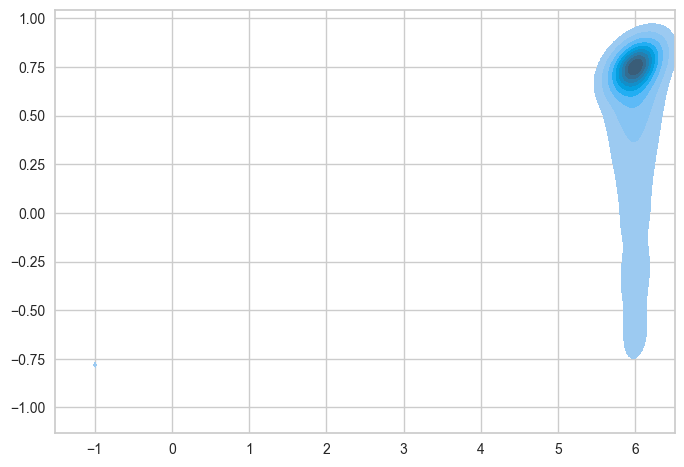

In [67]:
sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<Axes: xlabel='cluster', ylabel='sil_value'>

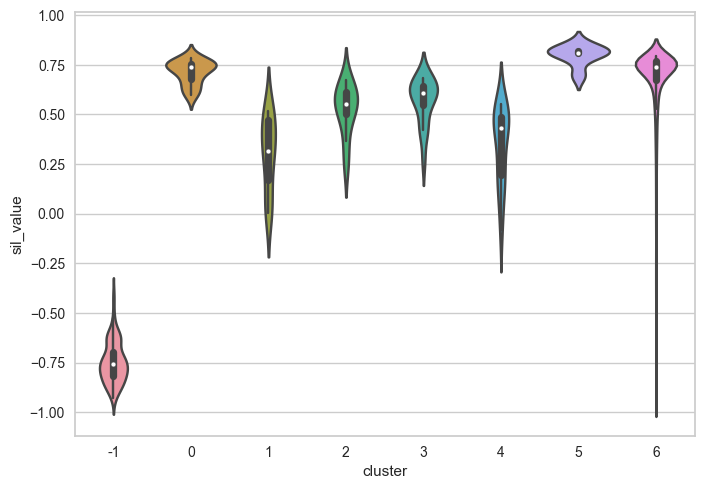

In [ ]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True)

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

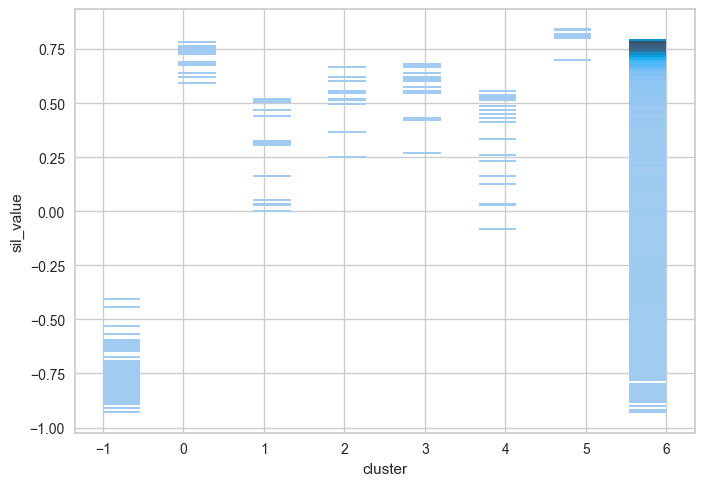

In [ ]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

Promedio de Silhouette por cluster:

In [ ]:
res_sil.groupby('cluster').mean('sil_value')

,sil_value
cluster,
-1,-0.747628
0,0.714034
1,0.301111
2,0.524563
3,0.568375
4,0.345993
5,0.799059
6,0.645379


--- 

# Ejercicio 🏃‍♀️ 🏃 ⏱

**Consideraciones**
- Nos basamos en el dataset de Kaggle: [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data).
<br>`data = pd.read_csv("aw_fb_data.csv", sep=",", index_col=0)`
- Repliquen el notebook y apliquen lo aprendido a este dataset.

**Preparación de datos**
- Eliminar la columna `X1` y hacer un get dummies.

**KMeans**
- Probar con `n_clusters=3`.
- Gráfico 3D para las columnas `x='gender', y='age', z='calories'` y `color='activity'`

**HDBSCAN**
- Probar con `min_cluster_size=80`.
---

**Output**

Hagan un storytelling para 3 cluster que les llamo la atención, tanto para KMeans y HDBSCAN.